Having a good understanding of how models work can help you choose the appropriate model, training algorithm, and set of hyperparameters. Understanding what's under the hood will also help debug issues and perform error analysis more efficiently.

**The Linear Regression model**: two methods of training
1. "Closed-form" equation directly computers model parameters
2. Iterative optimization approach, called gradient descent, gradually tweaks model parameters to minize cost function over training set

**Polynomial Regression**: more complex, fits nonlinear datasets, prone to overfitting. Use learning curves and regularization to reduce overfitting.

**Logistic Regression**

**Softmax Regression**

## Linear regression

A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the bias.

\begin{equation*}
\hat{y} = h_{\theta}(x) = \theta^{T} \cdot x
\end{equation*}

To train a linear regression model, we find the value of $\theta$ that minimizes the RMSE (equivalent to minimizing MSE).

\begin{equation*}
MSE(X,h_{\theta}) = \frac{1}{m}\sum^{m}_{i=1}(\theta^{T}\cdot x^{i} - y^{i})^2
\end{equation*}

### The normal equation

To find the value of $\theta$ that minimizes the cost function, there's a closed form solution that gives the result directly -- the normal equation.

\begin{equation*}
\hat{\theta} = (X^{T}\cdot X)^{-1}\cdot X^{T}\cdot y
\end{equation*}

Here, y is the vector of target values.

### Solve for $\hat{\Theta}$

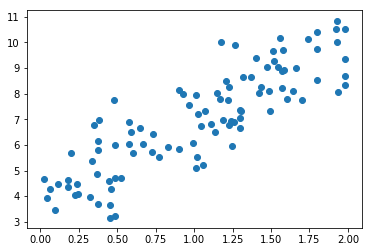

In [16]:
import numpy as np

## create some sample data, 100 observations
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

import matplotlib.pyplot as plt

plt.scatter(X,y);

In [17]:
## add ones to multiply agains the bias term in theta
X_b = np.c_[np.ones((100,1)), X]
##  plug into the equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best

array([[3.93002032],
       [2.99502519]])

We can make predictions from $\hat{\theta}$.

In [22]:
## each inner bracket is its own row
X_new = np.array([[0],[2]])
## add x0
X_new_b = np.c_[np.ones((2, 1)), X_new]
## to make a prediction, just take the dot product!
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.93002032],
       [9.9200707 ]])

In [26]:
print(X_new)
print(y_predict)

[[0]
 [2]]
[[3.93002032]
 [9.9200707 ]]


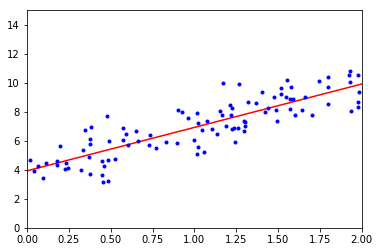

In [23]:
## this plots the line between two points, '-' represents a line
plt.plot(X_new, y_predict, "r-")
## plot points
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Equivalent code in Scikit-Learn:

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.93002032] [[2.99502519]]
[[3.93002032]
 [9.9200707 ]]


### The normal equation is expensive to compute

The normal equation computes the inverse of $X^{T}\cdot X$ which is an nxn matrix. Computation complexity of inverting such a matrix is extremely high. If you double features, you multiply computation time by 8. This is why we switch over to gradient descent for reasonably-sized data sets.

### Gradient descent

Generic optimization algorithm that traverses down the gradient. You start by filling $\theta$ with random values, then improve gradually until algorithm converges. 

Tips: 
* Choose learning rate so that convergence actually happens and within reasonable time.
* You should make sure all features have similar scale to speed up convergence

### Batch gradient descent

To implement gradient descent, you have to compute gradient of cost function w.r.t. each model parameter $\theta_{j}$ (the partial derivative).

\begin{equation*}
\nabla MSE_{\theta} = \frac{2}{m}X^{T}\cdot (X\cdot\theta - y)
\end{equation*}